# Phan loai mang noron voi TensorFlow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.1


# Tao du lieu de xem va dieu chinh

In [3]:
from sklearn.datasets import make_circles

#tao 100 mau
n_samples = 1000

#tao circle
X,y = make_circles(n_samples,
                   noise= 0.03,
                   random_state=42)



In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

In [7]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [8]:
# tao dataframe co dac trung va nhan

import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [9]:
# Kiem tra cac nhan khac nhau
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

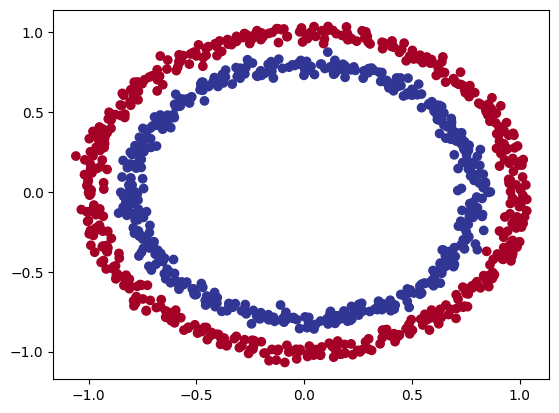

In [10]:
#Truc quan hoa voi bieu do
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [11]:
# Kiem tra shape 
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
len(X), len(y)

(1000, 1000)

In [13]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [14]:
X[919], y[919]

(array([0.53845414, 0.856206  ]), 0)

###Cac buoc lap mo hinh

In [15]:
# thiet lap random seed
tf.random.set_seed(42)

#1. Tao mo hinh su dung Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2 Bien dich mo hinh
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

#3 khop mo hinh
model_1.fit(X,y, epochs= 5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 6.7925 - accuracy: 0.4910
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


In [16]:
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [17]:
# Thiet lap random seed
tf.random.set_seed(42)

#1 Tao mo hinh tuong tu model_1 nhung them 1 lop
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2 Bien dich mo hinh
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

#3 Khop mo hinh
model_2.fit(X,y,epochs=100, verbose= 0)# dat verbose=0 de in ra it ket qua hon


In [18]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932819485664368, 0.5]

## Cai thien mo hinh

In [19]:
# thiet lap random seed
tf.random.set_seed(42)

#1 tao mo hinh (3 lop)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#2 Bien dich mo hinh
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#3 Khop mo hinh
model_3.fit(X,y,epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.8391 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6002 - accuracy: 0.4580
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7385 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4670
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4910
Epoch 11/

In [20]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Vẽ biểu đồ ranh giới quyết định do mô hình dự đoán trên X tạo ra.
  Hàm này được mô phỏng từ 2 nguồn:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid Xác định ranh giới trục của biểu đồ và tạo meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Tạo các giá trị X (chúng ta sẽ dự đoán trên tất cả các giá trị)
  x_in = np.c_[xx.ravel(), yy.ravel()] # chồng các mảng 2D với nhau: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Đưa ra dự đoán sử dụng mô hình đã huấn luyện
  y_pred = model.predict(x_in)

  # Kiểm tra cho đa lớp
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # Chúng ta cần reshape các dự đoán để chuẩn bị vẽ biểu đồ
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Vẽ biểu đồ ranh giới quyết định
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 3s 9ms/step
doing binary classifcation...


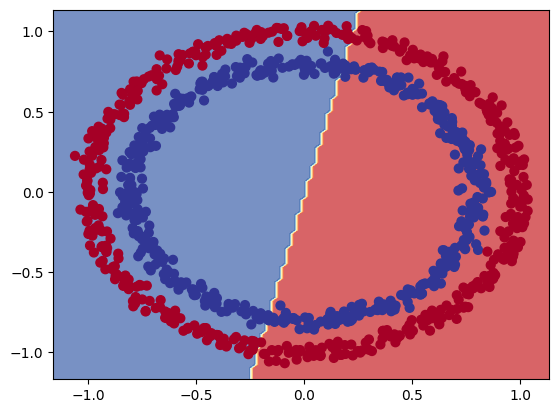

In [21]:
# Kiểm tra các dự đoán mà mô hình đưa ra
plot_decision_boundary(model_3, X, y)

In [22]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo một số dữ liệu hồi quy
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Chia thành tập huấn luyện và tập kiểm tra
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [23]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo lại mô hình
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Thay đổi loss và metrics của mô hình đã biên dịch
model_3.compile(loss=tf.keras.losses.mae, # đổi hàm mất mát thành hồi quy cụ thể
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # đổi metrics thành hồi quy cụ thể

# Khớp mô hình đã biên dịch
model_3.fit(X_reg_train.reshape(-1,1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 12ms/step - loss: 394.8311 - mae: 394.8311
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 297.5425 - mae: 297.5425
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 203.4066 - mae: 203.4066
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 104.9439 - mae: 104.9439
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 48.3933 - mae: 48.3933
Epoch 6/100
5/5 [==============================] - 0s 33ms/step - loss: 74.4873 - mae: 74.4873
Epoch 7/100
5/5 [==============================] - 0s 30ms/step - loss: 62.8562 - mae: 62.8562
Epoch 8/100
5/5 [==============================] - 0s 31ms/step - loss: 43.2128 - mae: 43.2128
Epoch 9/100
5/5 [==============================] - 0s 34ms/step - loss: 48.4710 - mae: 48.4710
Epoch 10/100
5/5 [==============================] - 0s 27ms/step - loss: 42.2476 - mae: 42.2476
Epoch 11/100
5/5 [========================

2/2 [==============================] - 0s 6ms/step


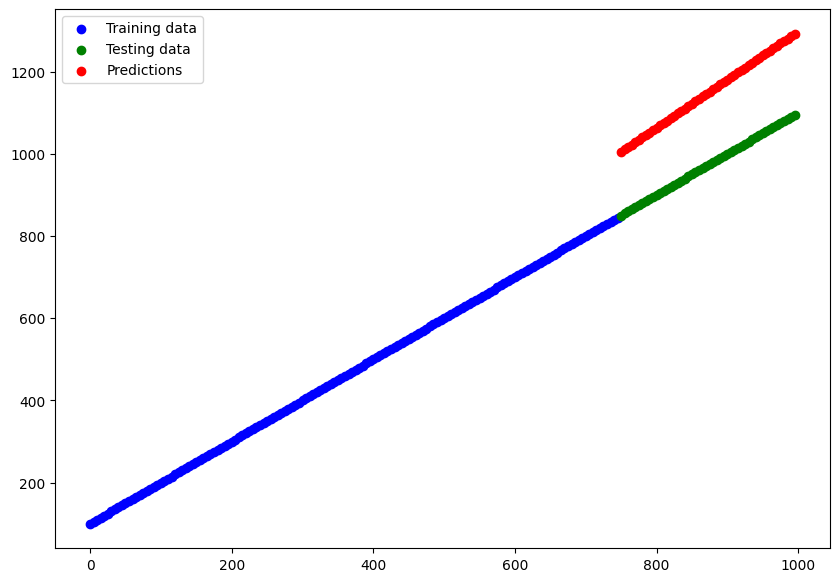

In [24]:
# Đưa ra dự đoán với mô hình đã huấn luyện
y_reg_preds = model_3.predict(y_reg_test)

# Vẽ các dự đoán của mô hình so với dữ liệu hồi quy
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

# Phan con thieu: Non-linearity


In [25]:
# Đặt random seed
tf.random.set_seed(42)

# Tạo mô hình
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 lớp ẩn với kích hoạt tuyến tính
  tf.keras.layers.Dense(1) # lớp đầu ra
])

# Biên dịch mô hình
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # "lr" là viết tắt của "learning rate"
                metrics=["accuracy"])

# Khớp mô hình
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 3.9155 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.7808 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 1.6344 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 1.5619 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 1.5030 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 1.4525 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4090 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 1.3700 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 1.3357 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.3040 - accuracy: 0.5000
Epoch 11/

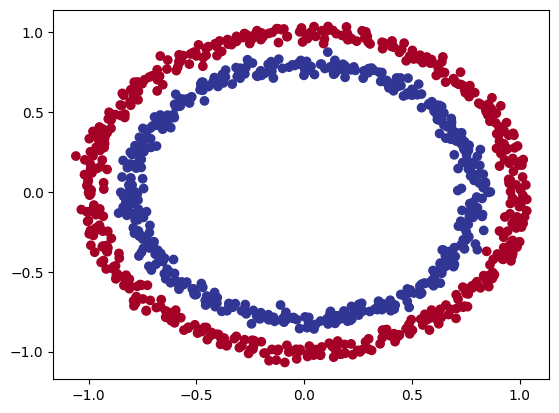

In [26]:
# Kiểm tra dữ liệu của chúng ta
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


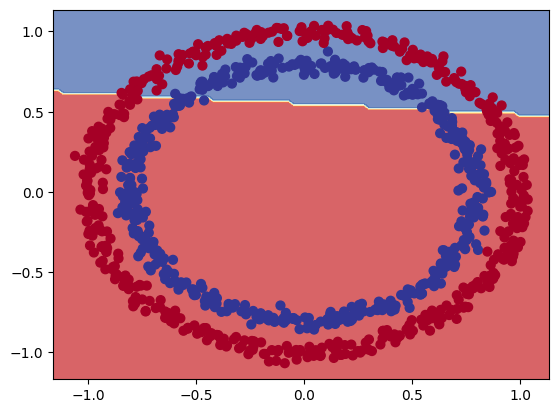

In [27]:
plot_decision_boundary(model_4, X, y)

In [28]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình với kích hoạt phi tuyến tính
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # cũng có thể đặt activation='relu'
  tf.keras.layers.Dense(1) # lớp đầu ra
])

# Biên dịch mô hình
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Khớp mô hình
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [29]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 1, 4 nơ-ron, kích hoạt ReLU
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 2, 4 nơ-ron, kích hoạt ReLU
  tf.keras.layers.Dense(1) # lớp đầu ra
])

# Biên dịch mô hình
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # tốc độ học mặc định của Adam là 0.001
                metrics=['accuracy'])

# Khớp mô hình
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 5.1407 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9368 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3067 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1406 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.0604 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 2.9956 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 2.9006 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6857 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 2.5914 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4297 - accuracy: 0.5000
Epoch 11/

In [30]:
# Đánh giá mô hình
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.4650


[0.707974374294281, 0.4650000035762787]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


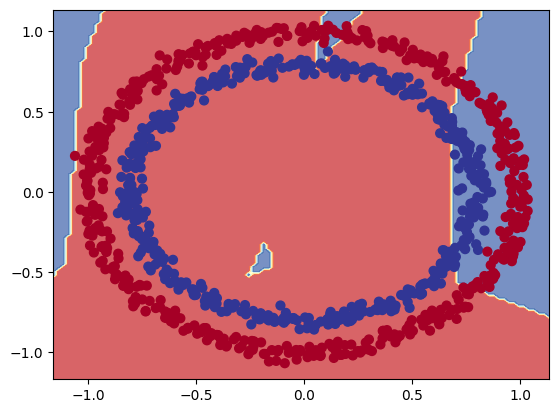

In [31]:
# Kiểm tra các dự đoán sử dụng 2 lớp ẩn
plot_decision_boundary(model_6, X, y)

In [32]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 1, kích hoạt ReLU
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # lớp ẩn 2, kích hoạt ReLU
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # lớp đầu ra, kích hoạt sigmoid
])

# Biên dịch mô hình
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Khớp mô hình
history = model_7.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 0.6917 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5090
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5060
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5140
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5160
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5190
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5170
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5650
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5460
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5300
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


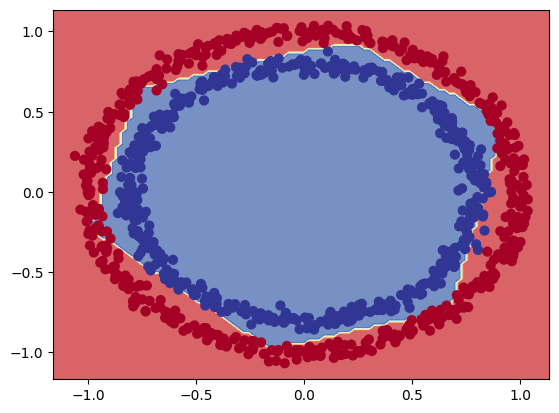

In [33]:
plot_decision_boundary(model_7, X, y)

In [34]:
# Tạo một tensor giả lập (giống với dữ liệu mà chúng ta truyền vào mô hình)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

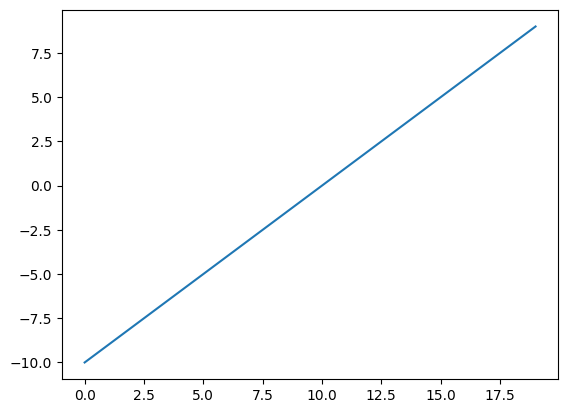

In [35]:
# Hiển thị tensor giả lập
plt.plot(A)

In [36]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Sử dụng hàm sigmoid trong tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

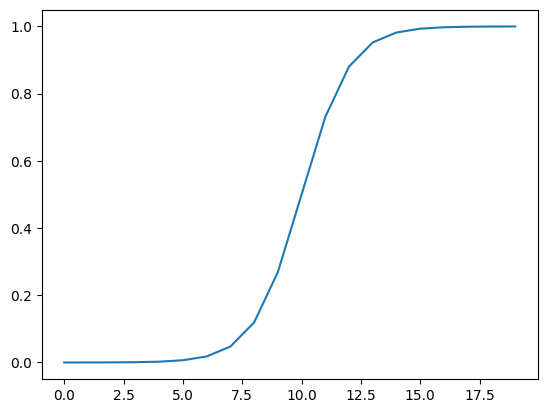

In [37]:
plt.plot(sigmoid(A));

In [38]:
def relu(x):
  return tf.maximum(0, x)

# Truyền tensor giả lập qua hàm ReLU
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

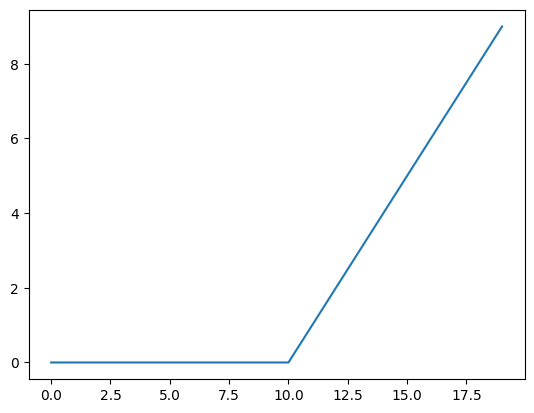

In [39]:
plt.plot(relu(A));

In [40]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [41]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Danh gia va cai thien mo hinh phan loai

In [42]:
len(X)

1000

In [43]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, y_train = X[:800], y[:800] # 80% dữ liệu cho tập huấn luyện
X_test, y_test = X[800:], y[800:] # 20% dữ liệu cho tập kiểm tra

# Kiểm tra shape của dữ liệu
X_train.shape, X_test.shape # 800 mẫu trong tập huấn luyện, 200 mẫu trong tập kiểm tra

((800, 2), (200, 2))

In [51]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình (tương tự như model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # lớp ẩn 1, sử dụng "relu" cho kích hoạt (tương tự như tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # lớp đầu ra, sử dụng 'sigmoid' cho đầu ra
])

# Biên dịch mô hình
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # tăng tốc độ học từ 0.001 thành 0.01 để học nhanh hơn
                metrics=['accuracy'])

# Khớp mô hình
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25


25/25 [==============================] - 1s 3ms/step - loss: 0.6818 - accuracy: 0.5763
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.6062
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6288
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.7613
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5880 - accuracy: 0.7987
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.8750
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.9275
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.9150
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.9750
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.9950
Epoch 11/25
25/25 [===========

In [52]:
# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9950
Model loss on the test set: 0.04991098493337631
Model accuracy on the test set: 99.50%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


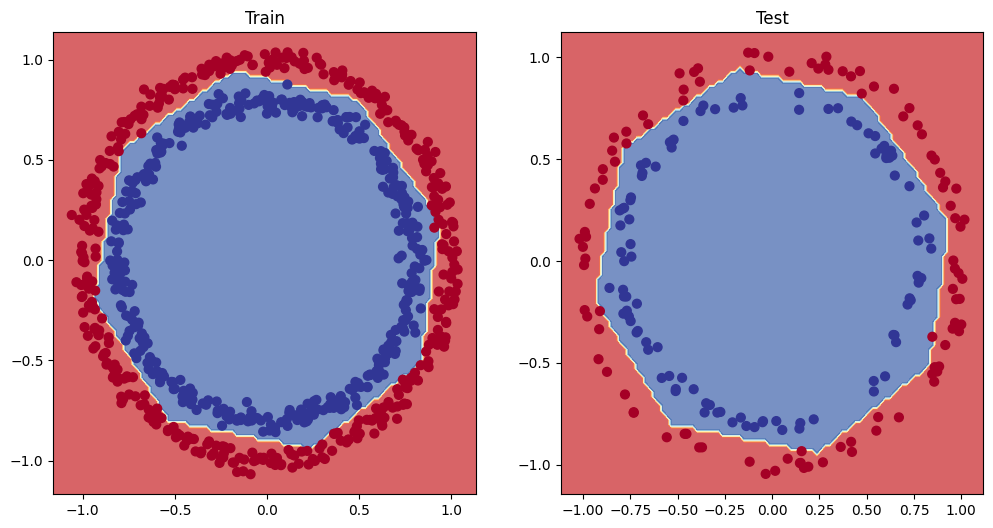

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

# Ve loss curve

In [54]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.681794,0.57625
1,0.671784,0.60625
2,0.658275,0.62875
3,0.634269,0.76125
4,0.587987,0.79875
5,0.538411,0.87500
6,0.480549,0.92750
7,0.421947,0.91500
8,0.351009,0.97500
9,0.282225,0.99500


Text(0.5, 1.0, 'Model_8 training curves')

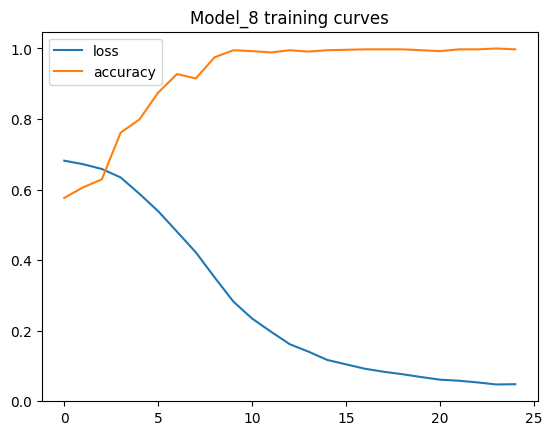

In [55]:
# Vẽ loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [56]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình (tương tự như model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Biên dịch mô hình
model_9.compile(loss="binary_crossentropy", # chúng ta cũng có thể sử dụng string ở đây
              optimizer="Adam", # tương tự như tf.keras.optimizers.Adam() với các thiết lập mặc định
              metrics=["accuracy"])

# Tạo learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # xem xét một tập hợp các giá trị tốc độ học từ 1e-4, tăng 10**(epoch/20) mỗi epoch

# Khớp mô hình (truyền lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7139 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7097 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7087 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7075 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

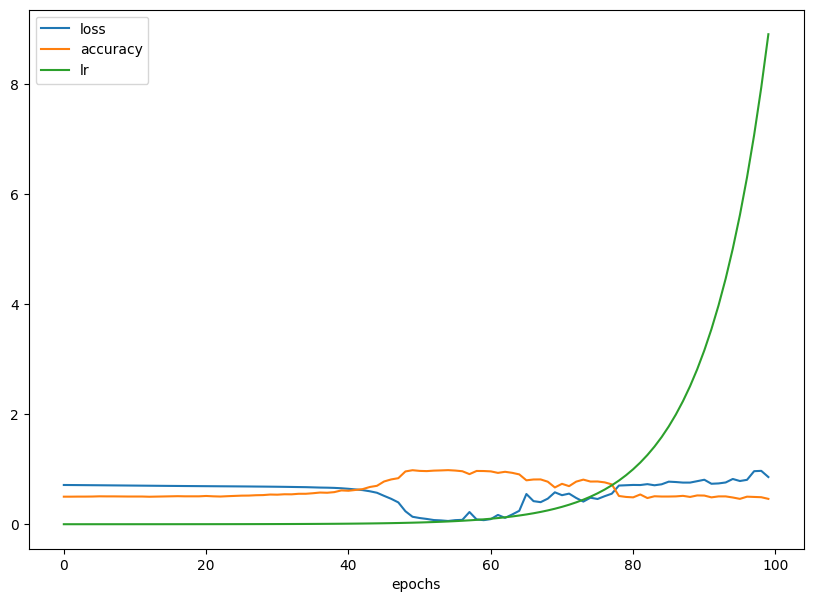

In [57]:
# Kiểm tra lịch sử
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. loss')

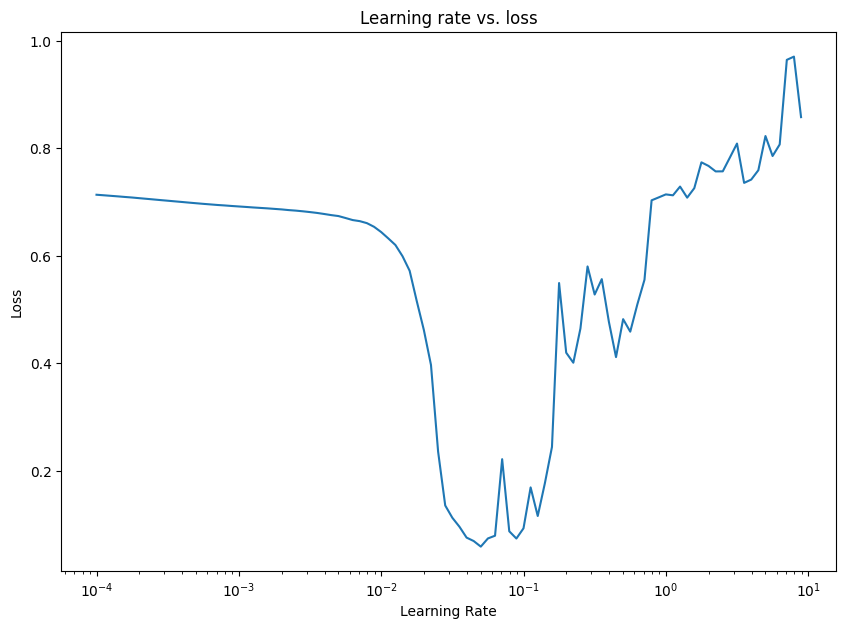

In [58]:
# Vẽ biểu đồ learning rate với loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # muốn trục x (learning rate) theo thang log
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [60]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Biên dịch mô hình với tốc độ học lý tưởng
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # sử dụng tf.keras.optimizers.Adam (không phải "adam") để điều chỉnh tốc độ học
                metrics=["accuracy"])

# Khớp mô hình cho 20 epoch (ít hơn trước 5)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6853 - accuracy: 0.5913
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5562
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.5700
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.5913
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6250
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6406 - accuracy: 0.6250
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6316 - accuracy: 0.6438
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.6700
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6675
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.6800
Epoch 11/20
25/25 [

In [61]:
# Kiểm tra độ chính xác của mô hình
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.5253 - accuracy: 0.7150
Model loss on test set: 0.5252885222434998
Model accuracy on test set: 71.50%


In [62]:
# Tạo confusion matrix
from sklearn.metrics import confusion_matrix

# Đưa ra dự đoán
y_preds = model_10.predict(X_test)

# Tạo confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 4ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets